<a href="https://colab.research.google.com/github/kkhrystynaa/Khrystyna_Kosiv/blob/master/Skelar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Завантаження та попередня обробка даних

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("events.csv", parse_dates=["request_time", "start_time", "finish_time"])

df["response_delay"] = (df["start_time"] - df["request_time"]).dt.total_seconds() / 60
df["handling_time"] = (df["finish_time"] - df["start_time"]).dt.total_seconds() / 60

df["date"] = df["request_time"].dt.date

Середній час відповіді по днях.
Кількість запитів із затримкою більше 45 хвилин

In [6]:
avg_response = df.groupby("date")["response_delay"].mean().reset_index()
bad_cases = df[df["response_delay"] > 45].groupby("date").size().reset_index(name="bad_delays")


Графік середнього часу відповіді

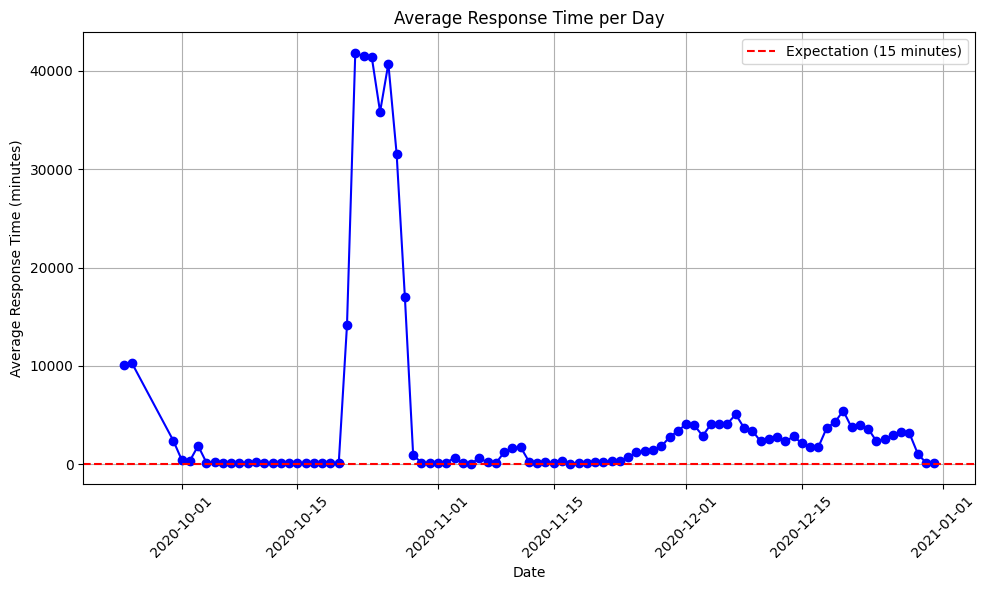

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(avg_response['date'], avg_response['response_delay'], marker='o', color='b')
plt.axhline(15, color='r', linestyle='--', label='Expectation (15 minutes)')
plt.title('Average Response Time per Day')
plt.xlabel('Date')
plt.ylabel('Average Response Time (minutes)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Графік запитів із затримкою більше 45 хвилин

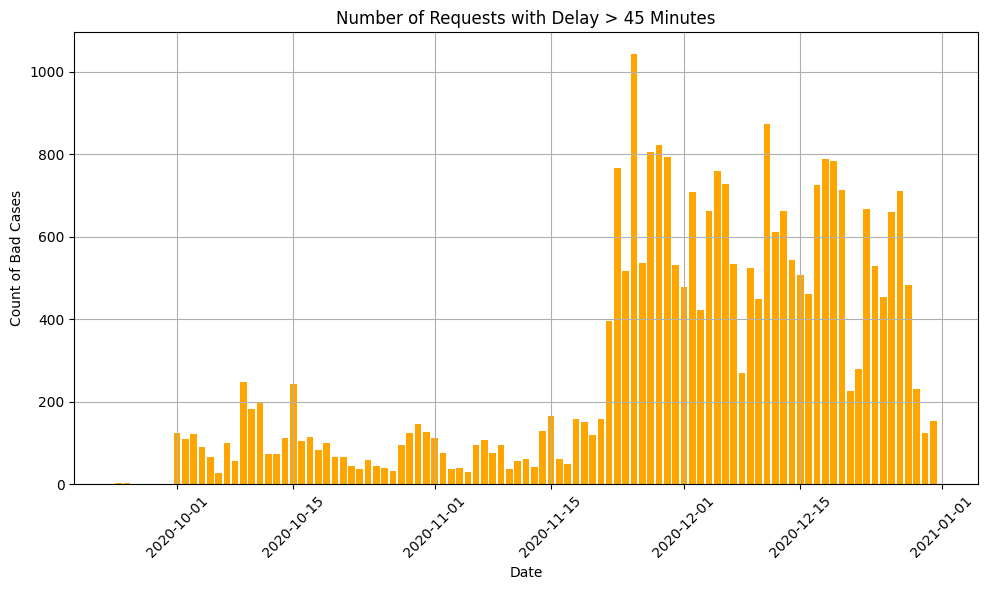

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(bad_cases['date'], bad_cases['bad_delays'], color='orange')
plt.title('Number of Requests with Delay > 45 Minutes')
plt.xlabel('Date')
plt.ylabel('Count of Bad Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
